<a href="https://colab.research.google.com/github/Asifbinsyed/Pytorch/blob/main/Computervision_ZTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.5.1+cu121
0.20.1+cu121


In [2]:
# start downloading the dataset
# Setup training data

train_data = datasets.FashionMNIST(root='data',
                                   train = True,
                                   download= True,
                                   transform = ToTensor(),
                                   target_transform = None)


test_data = datasets.FashionMNIST(root='data',
                                   train = False,
                                   download= True,
                                   transform = ToTensor(),
                                   target_transform = None)

100%|██████████| 26.4M/26.4M [00:21<00:00, 1.23MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 207kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.86MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 20.2MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# see the first few examples
image,label = train_data[0]
print(image, label)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
print(class_to_idx)

{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


In [7]:
image.shape

torch.Size([1, 28, 28])

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

 image shate torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

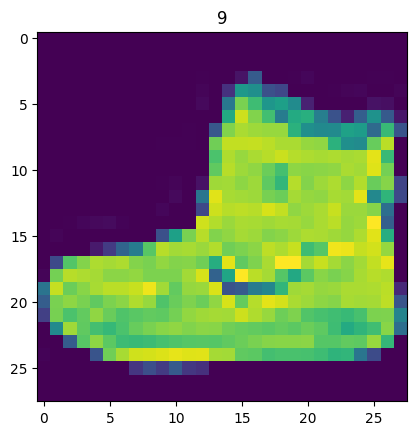

In [9]:
## Visualzing our data

import matplotlib.pyplot as plt
image, label = train_data[0]
print(f" image shate {image.shape}")
plt.imshow(image.squeeze(0))
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

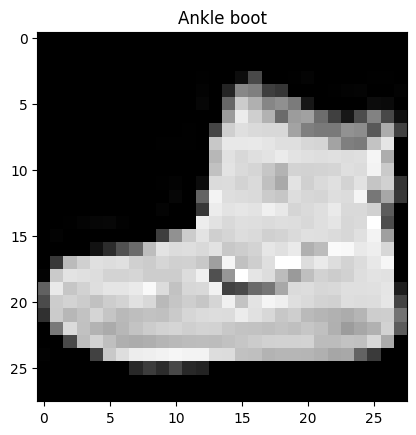

In [10]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

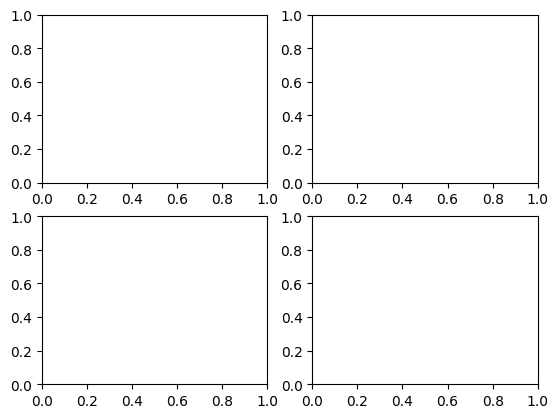

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure()  # Create a figure

ax1 = fig.add_subplot(2, 2, 1)  # Add a subplot in a 2x2 grid, at position 1
ax2 = fig.add_subplot(2, 2, 2)  # Add another subplot at position 2
ax3 = fig.add_subplot(2, 2, 3)  # Add another subplot at position 3
ax4 = fig.add_subplot(2, 2, 4)  # Add another subplot at position 4

plt.show()  # Display the figure with subplots

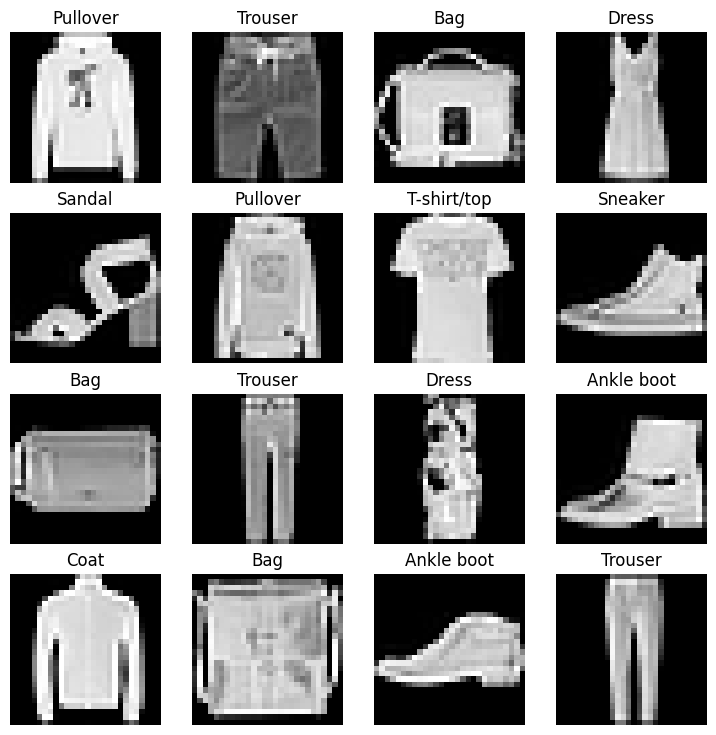

In [12]:
torch.manual_seed(44)
fig = plt.figure(figsize= (9,9))
rows,column =4,4
for i in range(1, rows*column + 1):
  random_idx= torch.randint(0,len(train_data),size=[1]).item()
  # print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(rows,column, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

# Dataloader

In [13]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [14]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

from here we can see that our data is in dataset format. so we want to convert
ito dataloader which in python iterables.  Basically we are creating batchsize. the important of batchsize is it is helpful for efficient computing

In [15]:
# we have to use `torch.utils.data.DataLoader` package to do it for both training and testing dat
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = 32,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                              batch_size = 32,
                              shuffle = False) # shuffling is not necessary for the test dat a



In [16]:
print(train_dataloader)
print(test_dataloader)

In [17]:
# Show a sample
train_features_batch, train_labels_batch = next(iter(train_dataloader))
print(train_features_batch.shape)



torch.Size([32, 1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

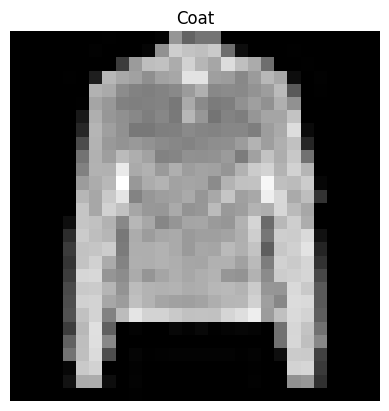

In [18]:
torch.manual_seed(43)
random_idx = torch.randint(0,len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap = "gray")
plt.title(class_names[label])
plt.axis(False)

# Creating a Baseline Model

When creating a machine learning or Deep learning model start with a baseline model. then you will improve upon the baseline models.

In [19]:
# Creating a flatten layer
flatten_model = nn.Flatten()

# Get a single modle
x = train_features_batch[0]
print(x.shape)
# flatten the smaple
output = flatten_model(x)
print(output.shape)

torch.Size([1, 28, 28])
torch.Size([1, 784])


The thing is we need to create a class for the model


In [20]:
from torch import nn
class FashionMnistV0(nn.Module):
  def __init__(self,
               input_shape : int,
               hidden_units : int,
               output_shape : int):
    super().__init__()
    self.layer_stack = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features= input_shape,
                out_features= hidden_units),
      nn.Linear(in_features =hidden_units,
               out_features = output_shape))

  def forward(self,x):
    return self.layer_stack(x)



In [21]:
torch.manual_seed(42)

model_0 = FashionMnistV0(784,10, output_shape= len(class_names)).to("cpu")

model_0

FashionMnistV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [22]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [23]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [24]:
## 3.1 loss optimizer and optimization metrics

import requests
from pathlib import Path

# Download the helper function.py
if Path("helper_functions.py").is_file():
  print("helper function exists. skip downloading ....")

else:
  print("Downloading the helper function")
  requests = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(requests.content)

In [25]:
from helper_functions import accuracy_fn

# Setup loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params = model_0.parameters(),
                           lr =0.1)

In [26]:
# Creating a function to time our experiments.
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """ Print difference between start and end time """
  total_time = end - start
  print(f" train time on {device}: {total_time:.3f} seconds")

In [27]:
start_time= timer()

end_time = timer()
print_train_time(start= start_time, end=end_time, device="cpu" )

 train time on cpu: 0.002 seconds


In [28]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# set the seeds and start the timer.
torch.manual_seed(42)
train_time_start_on_cpu = timer()


#set the number of epochs
epochs = 3

# Creating a training and testing loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n...")

  #Training
  train_loss = 0

  # add a loop to loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    # Forwardpass
    y_pred = model_0(X)

    #calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # optimizer
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 ==0:
      print(f"Looked at teh {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss/= len(train_dataloader)

  # Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      test_pred = model_0(X_test)

      test_loss+= loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true= y_test, y_pred= test_pred.argmax(dim= 1))
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"\n train loss {train_loss:.4f}| test loss{test_loss: .4f}, test accuracy {test_acc: .4f}")
train_time_end_on_cpu = timer()

total_train_time_on_model_0 = print_train_time(start = train_time_start_on_cpu,
                                               end = train_time_end_on_cpu,
                                               device = str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
...
Looked at teh 0/60000 samples
Looked at teh 12800/60000 samples
Looked at teh 25600/60000 samples
Looked at teh 38400/60000 samples
Looked at teh 51200/60000 samples

 train loss 0.5904| test loss 0.5095, test accuracy  82.0387
Epoch: 1
...
Looked at teh 0/60000 samples
Looked at teh 12800/60000 samples
Looked at teh 25600/60000 samples
Looked at teh 38400/60000 samples
Looked at teh 51200/60000 samples

 train loss 0.4763| test loss 0.4799, test accuracy  83.1969
Epoch: 2
...
Looked at teh 0/60000 samples
Looked at teh 12800/60000 samples
Looked at teh 25600/60000 samples
Looked at teh 38400/60000 samples
Looked at teh 51200/60000 samples

 train loss 0.4550| test loss 0.4766, test accuracy  83.4265
 train time on cpu: 28.519 seconds


In [29]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'FashionMnistV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [30]:
#5. Device agnostic code
!nvidia-smi

Mon Dec  2 02:24:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [31]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# Creating nonLinear model

In [32]:
# model1: building a better model with nonlinearity
from torch import nn

class FashionMnistV1(nn.Module):
  """

  """
  def __init__(self, input_shape: int,
               hidden_units: int,
               output_shape : int):
               # creating all the layers
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units, out_features=output_shape),
        nn.ReLU())

  # define forward method
  def forward(self,x):
    return self.layer_stack(x)

In [33]:
# Let's create the model with all the parameter. previously we only created
# the class. now we have to create an object

Model_1= FashionMnistV1(input_shape=784, hidden_units=10, output_shape=len(class_names)).to("cuda")
Model_1

FashionMnistV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [34]:
# Now let's create a dummy dataset and input it inside
Random_data= torch.rand([1,1,28,28], device="cuda")
Model_1(Random_data)

tensor([[0.4329, 0.0000, 0.1563, 0.0518, 0.2361, 0.2726, 0.0000, 0.0000, 0.0000,
         0.1312]], device='cuda:0', grad_fn=<ReluBackward0>)

## Let's now setup a loss function , optimizer and evaluation metrics

In [35]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [36]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=Model_1.parameters(), lr=0.1)

In [37]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_gpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        Model_1.train()
        # Move data to the same device as the model
        X, y = X.to(device), y.to(device)
        # 1. Forward pass
        y_pred = Model_1(X) # Use Model_1 instead of model_0

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    Model_1.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # Move data to the same device as the model
            X, y = X.to(device), y.to(device)
            # 1. Forward pass
            test_pred = Model_1(X)

            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_gpu = timer()
total_train_time_Model1 = print_train_time(start=train_time_start_on_gpu,
                                           end=train_time_end_on_gpu,
                                           device=str(next(Model_1.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.98248 | Test loss: 0.76060, Test acc: 72.80%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.70366 | Test loss: 0.71731, Test acc: 73.67%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.67375 | Test loss: 0.69170, Test acc: 74.81%

 train time on cuda:0: 37.474 seconds


In [38]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code
Model_1_results = eval_model(model=Model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
Model_1_results

{'model_name': 'FashionMnistV1',
 'model_loss': 0.6917039752006531,
 'model_acc': 74.810303514377}

In [39]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")


In [40]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=Model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=Model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_Model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.65675 | Train accuracy: 75.87%
Test loss: 0.71773 | Test accuracy: 74.20%

Epoch: 1
---------
Train loss: 0.64552 | Train accuracy: 76.14%
Test loss: 0.68934 | Test accuracy: 74.90%

Epoch: 2
---------
Train loss: 0.63701 | Train accuracy: 76.36%
Test loss: 0.68991 | Test accuracy: 75.12%

 train time on cuda: 31.765 seconds


In [41]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code
model_1_results = eval_model(model=Model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'FashionMnistV1',
 'model_loss': 0.6899141073226929,
 'model_acc': 75.11980830670926}

# Create the Convolutional neural Network
https://poloclub.github.io/cnn-explainer/

In [42]:
import torch
from torch import nn

#Now let's create the model step by step :
class FasionMNISTV3(nn.Module):
  """ Creating the class from nn.Module which is a parent class"""
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    # Let's create the first block of Conv2D
    self.Conv_block1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape, out_channels = output_shape, kernel_size=3, stride=1, padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = input_shape, out_channels = output_shape, kernel_size=3, stride=1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)

    )
    self.Conv_block2 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape, out_channels = output_shape, kernel_size=3, stride=1, padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = input_shape, out_channels = output_shape, kernel_size=3, stride=1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier= nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features = output_shape),
        nn.ReLU())
    def forward(self, x:torch.Tensor):
      x = self.Conv_block1(x),
      x= self.Conv_block2(x),
      x = self.classifier(x)
      return x



In [43]:
# Let's create an instance of this model
torch.manual_seed(42)
Model2= FasionMNISTV3(input_shape=1, hidden_units= 10, output_shape= len(class_names)).to(device)
Model2

FasionMNISTV3(
  (Conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Conv_block2): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1, out_features=10, bias=True)
    (2): ReLU()
  )
)

In [44]:
# Now let's diveinto the conv2d layer. we want to replicate the exact same layer with
# same input for Tiny VGG net. we will do that with a dummy image data
# create a random tensor for batch
# take the first input from the batch
# Check the shape for both batch and image
# Create a single conv2d layer (the parameters are input -> (64,64,3), kernel -> (3,3), stride = 1 , padding = 1
# pass the data to our convolutional layer
# if you face any error while creating the

In [54]:
# dummy dataset
batch_image = torch.rand([32,3, 64,64])
single_image = batch_image[0]

print(f"the shape of the batch is {batch_image}")
print(f"the shape of the single image  is {single_image}")


the shape of the batch is tensor([[[[0.1536, 0.8228, 0.2271,  ..., 0.0660, 0.7457, 0.0904],
          [0.5625, 0.5418, 0.6765,  ..., 0.3918, 0.3398, 0.3182],
          [0.4828, 0.6206, 0.3070,  ..., 0.8504, 0.2909, 0.1725],
          ...,
          [0.1485, 0.3037, 0.0970,  ..., 0.4690, 0.3538, 0.8389],
          [0.4515, 0.4663, 0.7266,  ..., 0.0223, 0.5025, 0.1239],
          [0.9361, 0.4601, 0.2563,  ..., 0.1369, 0.7541, 0.4474]],

         [[0.9671, 0.1271, 0.2647,  ..., 0.6521, 0.9639, 0.8391],
          [0.5110, 0.7789, 0.6433,  ..., 0.1223, 0.6570, 0.9200],
          [0.2148, 0.5303, 0.7805,  ..., 0.7539, 0.2661, 0.5278],
          ...,
          [0.6702, 0.7029, 0.4890,  ..., 0.2634, 0.0911, 0.9256],
          [0.5365, 0.5746, 0.7995,  ..., 0.3269, 0.7158, 0.1980],
          [0.1057, 0.1257, 0.7111,  ..., 0.6339, 0.3784, 0.5888]],

         [[0.3766, 0.6650, 0.0533,  ..., 0.3665, 0.4073, 0.2250],
          [0.9284, 0.6055, 0.9294,  ..., 0.7997, 0.2994, 0.5373],
          [0.147

In [55]:
convolution_layer = nn.Sequential(nn.Conv2d(in_channels=3, out_channels= 10, kernel_size=(3,3), stride=1, padding=1))
convolution_layer

Sequential(
  (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

In [60]:
conv_output = convolution_layer(single_image)

In [61]:
print(single_image.shape)
conv_output.shape

torch.Size([3, 64, 64])


torch.Size([10, 64, 64])